# Words and Brains - Basic Features

Welcome to my WordGame project! In this first notebook, we are going to divide the people in this dataset into two neuro-classes and extract some features basic features, such as average word length, for each of these classes.

First we do the usual library imports and stuff. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns # data visualization

from subprocess import check_output
#print(check_output(["ls", "../input/wordgame"]).decode("utf8"))

# color palette for plotting
pal = sns.color_palette("Paired", 10)

Now, let's open up the dataset.

In [2]:
#df = pd.read_csv('../input/wordgame/wordgame_20170628.csv', dtype='object')
df = pd.read_csv('../data/processed/wordgame_20170628.csv', dtype='object')

#print dataset dimensions
print(df.shape)

#print first 5 rows
df.head()

(334036, 4)


,author,word1,word2,source
0,1203,jailed,imprisoned,ecig
1,5839,ME,Liverbird,wrongplanet
2,2962,Reach,up,sas
3,1066,owie,band-aid,ecig
4,5006,Water,River,wrongplanet


The dataset contains 334036 rows and 4 variables. Some word associations are really logical and others are really strange.

# Authors and sources


Number of unique authors: 6335


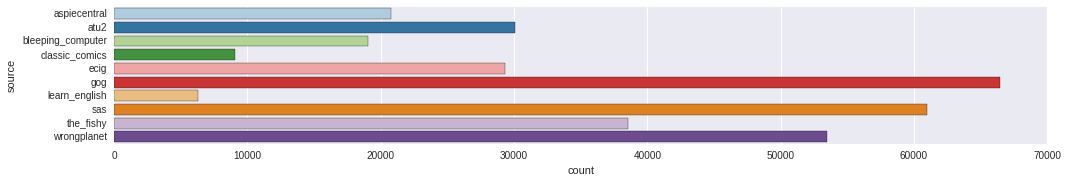

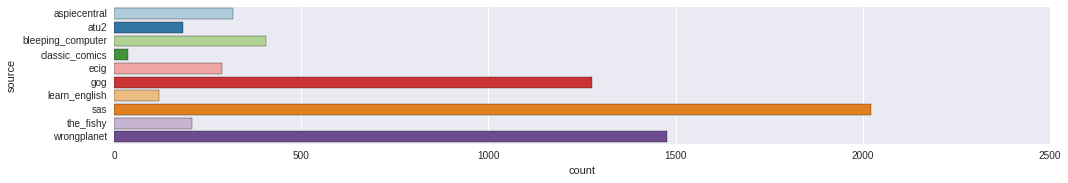

In [40]:
#
sources_list = ['aspiecentral','atu2','bleeping_computer', 'classic_comics','ecig','gog','learn_english','sas','the_fishy','wrongplanet']

# list of source-sizes 
N10 = df.source.value_counts(sort=False).tolist()

#
a = df[['author','source']][:].drop_duplicates()
print("Number of unique authors: " + str(len(a)))

# Plot
g1 = sns.factorplot(y='source', data=df, kind='count', size=2.5, aspect=6, palette=pal, order=sources_list)
g2 = sns.factorplot(y='source', data=a, kind='count', size=2.5, aspect=6, palette=pal, order=sources_list)
plt.show()

There are 10 different sources, the GOG is the biggest and learn_english is the smallest. Authors...

# Lowercase words

We want to ignore casing, so that 'Water' and 'water' will be considered to be the same word with the same meaning. We do this by converting all characters to lowercase.  

In [24]:
#print average number of duplicate words
print("Average number of duplicate words: ")
print("\tBefore lowercase: " + str(df.word1.value_counts().mean()))

# convert all words to lowercase
df['word1'] = df['word1'].map(str).apply(lambda x: x.lower())
df['word2'] = df['word2'].map(str).apply(lambda x: x.lower())

print("\tAfter lowercase:  " +str(df.word1.value_counts().mean()))

Average number of duplicate words: 
	Before lowercase: 4.18957732347
	After lowercase:  5.48841641747


The in the original data the average number of duplicates was 4, lowercasing has increased this to 5.5. 

# Source IDs
By converting the categorical source values to (categorical) integers, we are able to loop over these values. 

In [25]:
# create a source ID 
df['sourceID'] = df['source'].astype('category').cat.codes

# just a simple loop over sourceIDs 
print("Average number of duplicates within specific source:")
for i in range(0,10):
    subset = df[df['sourceID']==i]
    print(str(i) + "\t" + str(subset.word1.value_counts().mean()) + "\t" + str(subset.source.iloc[0]))

Average number of duplicates within specific source:
0	1.65399602386	aspiecentral
1	1.9707445064	atu2
2	1.83747591522	bleeping_computer
3	1.53866982569	classic_comics
4	2.406167979	ecig
5	3.11868461791	gog
6	1.54121687929	learn_english
7	4.0298201534	sas
8	2.834436599	the_fishy
9	2.80345153168	wrongplanet


The sources are ordered alphabetically. There are also hugh differences in the average number of duplicates amoung communities. SAS second biggest source, but smallest number of authors -> high duplicates. 

# Term frequency

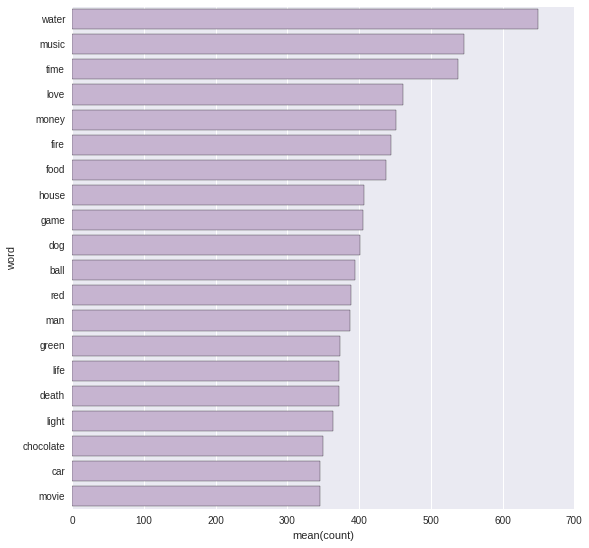

In [42]:
# frequency/count of word1 in de dataset
df['tf'] = df.groupby(['word1'])['word1'].transform('count')
# normalized term frequency
df['tf'] = df['tf']/len(df)

#stats..

frq_wrds = df.word1.value_counts().head(20)
frq_df = pd.DataFrame()
frq_df['word'] = frq_wrds.index
frq_df['count'] = frq_wrds.tolist()

#Plot
plt.figure(figsize=(9, 9))
sns.barplot("count", "word", data=frq_df, orient="h", color=pal[8])
plt.show()

# Term frequency sources

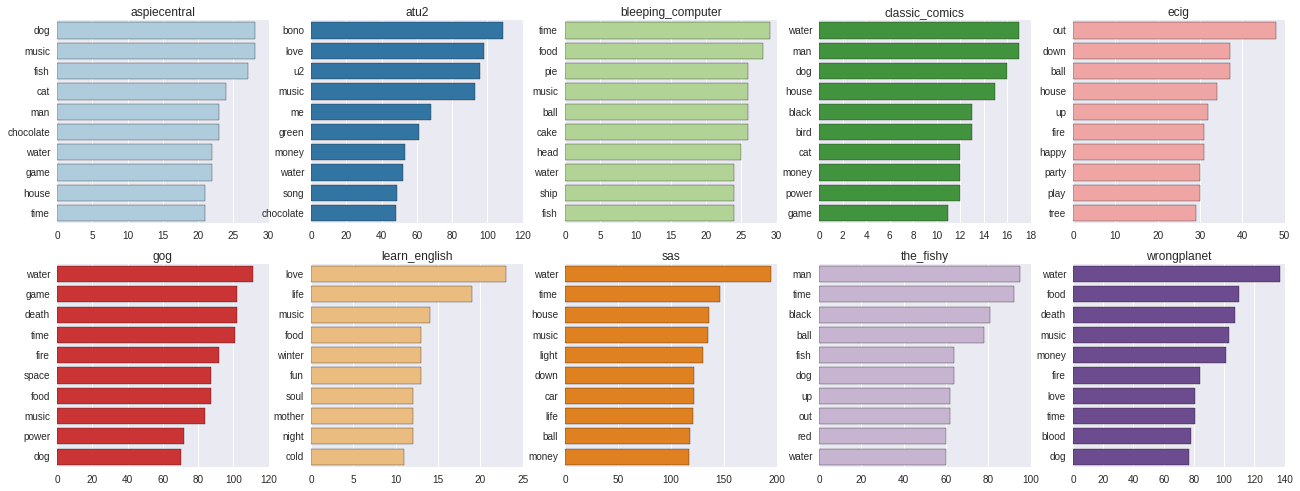

In [43]:
def normTF10(r):
    return r.tf10/(N10[r.sourceID])

#term frequency 
df['tf10'] = df.groupby(['word1','source'])['word1'].transform('count')
# normalized term frequency
df['tf10'] = df.apply(normTF10, axis=1)

plt.figure(figsize=(22, 8))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    frq_wrds = df[df['sourceID']==i].word1.value_counts().head(10)
    frq_df = pd.DataFrame()
    frq_df['word'] = frq_wrds.index
    frq_df['count'] = frq_wrds.tolist()
    sns.barplot("count", "word", data=frq_df, orient="h", color=pal[i])
    plt.title(sources_list[i])
    plt.xlabel('')
    plt.ylabel('')
plt.show()

...

# Document frequency


In [28]:
#create postings lists
aspieslist = (df['word1'][df['source']=="aspiecentral"]).unique().tolist()
atu2list = (df['word1'][df['source']=="atu2"]).unique().tolist()
bleeplist = (df['word1'][df['source']=="bleeping_computer"]).unique().tolist()
comicslist = (df['word1'][df['source']=="classic_comics"]).unique().tolist()
eciglist = (df['word1'][df['source']=="ecig"]).unique().tolist()
goglist = (df['word1'][df['source']=="gog"]).unique().tolist()
englishlist = (df['word1'][df['source']=="learn_english"]).unique().tolist()
saslist = (df['word1'][df['source']=="sas"]).unique().tolist()
fishlist = (df['word1'][df['source']=="the_fishy"]).unique().tolist()
wronglist = (df['word1'][df['source']=="wrongplanet"]).unique().tolist()

df['df'] = (df['word1'].isin(aspieslist).astype(int) + df['word1'].isin(atu2list).astype(int) 
             + df['word1'].isin(bleeplist).astype(int) + df['word1'].isin(comicslist).astype(int)
             + df['word1'].isin(eciglist).astype(int) + df['word1'].isin(goglist).astype(int)
             + df['word1'].isin(englishlist).astype(int) + df['word1'].isin(saslist).astype(int)
             + df['word1'].isin(fishlist).astype(int) + df['word1'].isin(wronglist).astype(int))

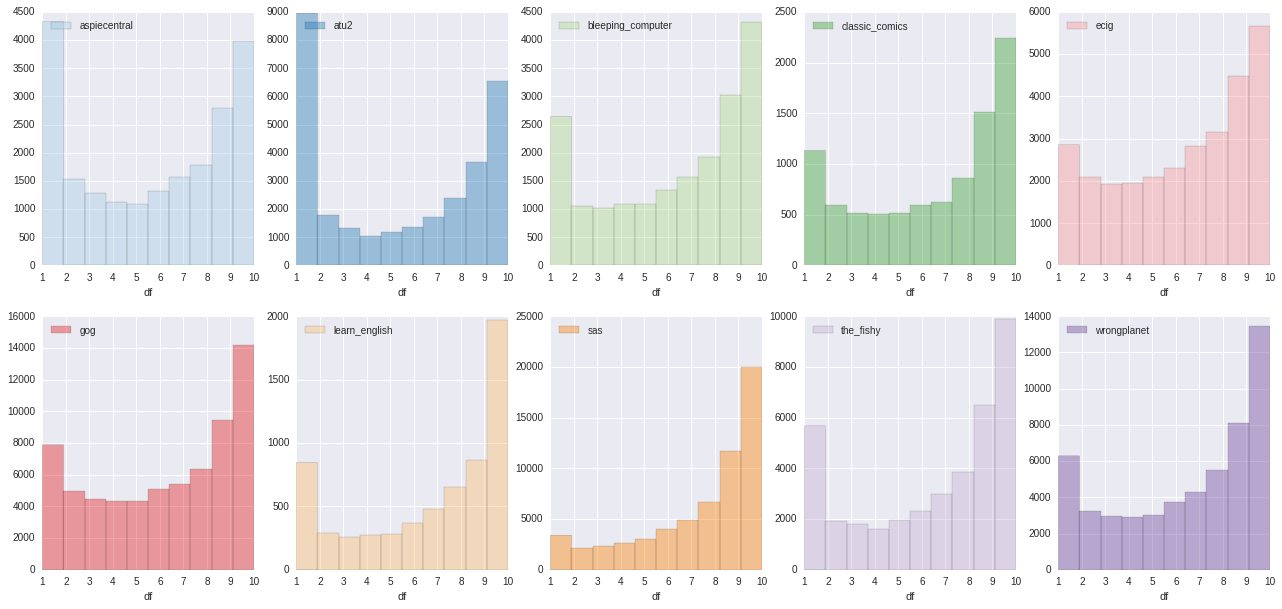

In [44]:
plt.figure(figsize=(22, 10))
for i in range(0,10):
    plt.subplot(2, 5, i+1)
    s = df[df['sourceID']==i]
    g = sns.distplot(s['df'], bins=10, label=sources_list[i], kde=False, color=pal[i])
    plt.legend(loc='upper left')
    axes = plt.gca()
    axes.set_xlim([1,10])
plt.show()

# Pair frequency

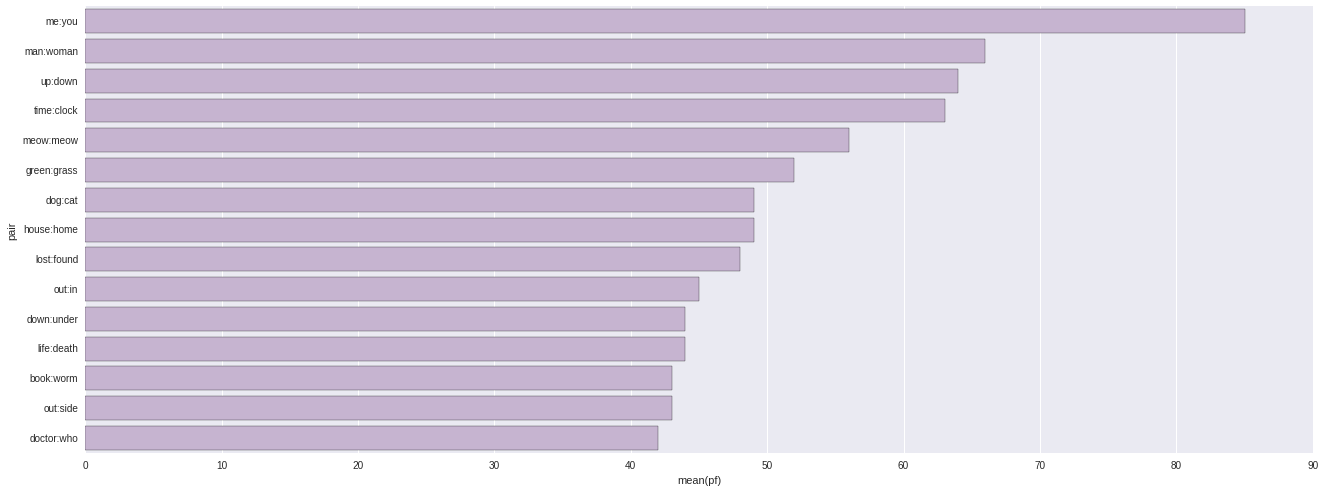

In [45]:
#concatenates word1 and word2 separated by a special character which does not appear in the words itself
def concat(r):
    return str(r.word1) + ":" + str(r.word2)

def normPF10(r):
    return r.pf10/(N10[r.sourceID])


df['pair'] = df.apply(concat, axis=1)

df['pf'] = df.groupby(['pair'])['pair'].transform('count')
df['pf10'] = df.groupby(['pair','source'])['pair'].transform('count')
# normalized pair frequency
df['pf10'] = df.apply(normPF10, axis=1)

#Plot
freq_pairs = df.sort_values(by=['pf'], ascending=False).drop_duplicates(subset=['pair']).head(15)

plt.figure(figsize=(22, 8))
sns.barplot("pf", "pair", data=freq_pairs, orient="h", color=pal[8])
plt.show()

df['pf'] = df['pf']/len(df)

# TFIDF

In [46]:
#standard idf smoothing
def tfidf10(r):
    return (r.tf10)*(np.log(1+(10/r.df)))

df['tfidf10'] = df.apply(tfidf10, axis=1)

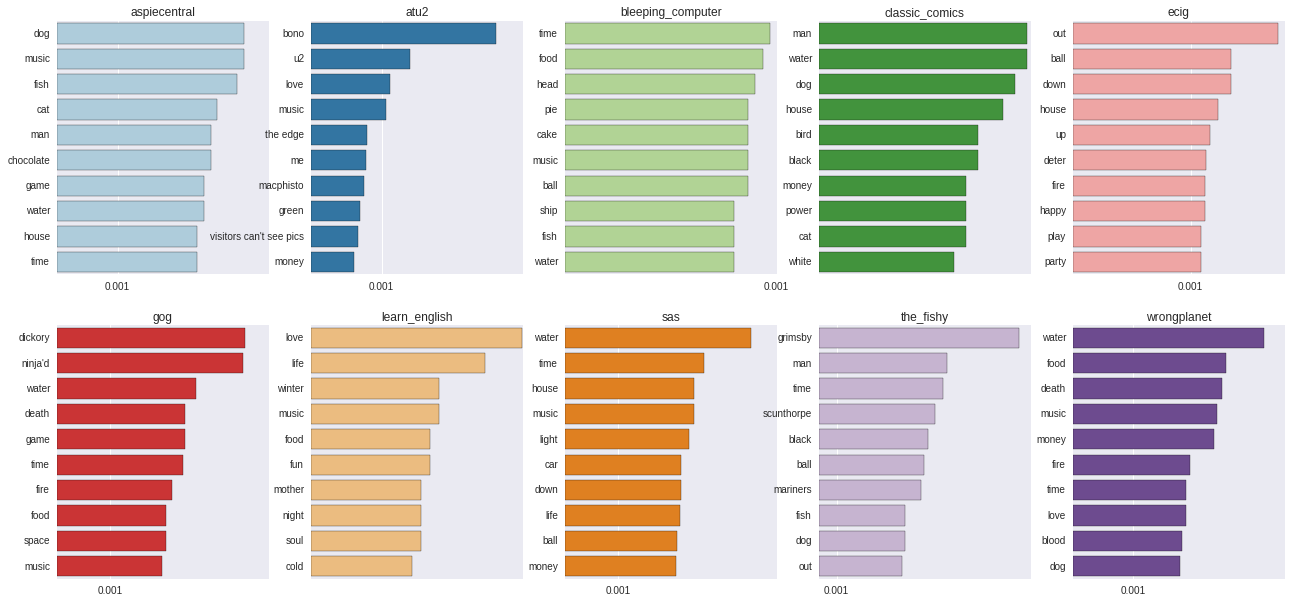

In [47]:
temp = df.sort_values(by=['tfidf10'], ascending=False)

plt.figure(figsize=(22, 10))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    frq_wrds = temp[temp['sourceID']==i].drop_duplicates(subset=['word1']).head(10)
    frq_df = pd.DataFrame()
    frq_df['word'] = frq_wrds.word1
    frq_df['count'] = frq_wrds.tfidf10
    g = sns.barplot("count", "word", data=frq_df, orient="h", color=pal[i])
    g.set(xticks=[0.001])
    plt.title(sources_list[i])    
    plt.xlabel('')
    plt.ylabel('')
plt.show()

..

# PFIDF



In [52]:
def pfidf10(r):
    return (r.pf10)*(np.log(1+(10/r.df)))

df['pfidf10'] = df.apply(pfidf10, axis=1)

# Save features

In [53]:
#df = df.drop('tf10_wn',1)
#df = df.drop('pfidf',1)

#set output filename
outfile = "../data/processed/wordgame_20170628_freq.csv"

# write rows to file
df.to_csv(outfile, sep=',', index=False)
df.head()

,author,word1,word2,source,pair,pf,pf10,sourceID,tf,tf10,df,tfidf10,pfidf10
0,1203,jailed,imprisoned,ecig,jailed:imprisoned,0.000003,0.000052,4,0.000021,0.000315,2,0.000564,0.000094
1,5839,me,liverbird,wrongplanet,me:liverbird,0.000003,0.000033,9,0.000967,0.001564,10,0.001084,0.000023
2,2962,reach,up,sas,reach:up,0.000003,0.000026,7,0.000036,0.000130,5,0.000143,0.000029
3,1066,owie,band-aid,ecig,owie:band-aid,0.000003,0.000052,4,0.000009,0.000105,2,0.000188,0.000094
4,5006,water,river,wrongplanet,water:river,0.000045,0.000266,9,0.001943,0.004560,10,0.003161,0.000185


Bye!